In [1]:
import torch
import torchvision
from torch.autograd import Variable
import numpy as np
print(torch.__version__)

1.10.0


In [2]:
!pip install ipdb
import ipdb

  Created wheel for ipdb: filename=ipdb-0.13.9-py3-none-any.whl size=11648 sha256=0921ebe54375d360c430136829670e6b394e385f366eead8a39ef408ebff7753
  Stored in directory: c:\users\wuxin\appdata\local\pip\cache\wheels\f7\29\9a\cf774cd86e9802f075a0be1c9e0830bc062d07897b2e9e87cd
Successfully built ipdb


In [3]:
def f(x):
    return x**2 + 2*x + 6

In [6]:
x = torch.from_numpy(np_x).requires_grad_(True)
y = f(x)
print(x,y)

tensor([4.], dtype=torch.float64, requires_grad=True) tensor([30.], dtype=torch.float64, grad_fn=<AddBackward0>)


In [7]:
print(y)

tensor([30.], dtype=torch.float64, grad_fn=<AddBackward0>)


In [8]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

from torchvision import datasets, transforms

mnist_train = datasets.MNIST('data', train=True, download=True,
                       transform=transforms.ToTensor())

mnist_test = datasets.MNIST('../data', train=False, download=True, transform=
                            transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data\MNIST\raw\train-images-idx3-ubyte.gz to ../data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\MNIST\raw



In [9]:
print(mnist_train)


Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


Label:  2


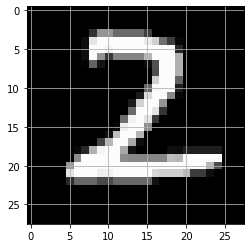

In [10]:
i = 732  # try different indices
example = mnist_train[i]
print("Label: ", example[1])
plt.imshow(example[0].reshape((28,28)), cmap = plt.cm.gray)
plt.grid(None)

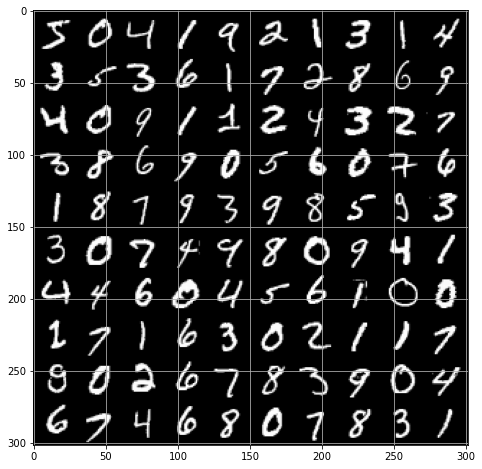

In [11]:
from torch.utils.data import DataLoader
train_dl = DataLoader(mnist_train, batch_size=100)
dataiter = iter(train_dl)
images, labels = dataiter.next()
viz = torchvision.utils.make_grid(images, nrow=10, padding = 2).numpy()
fig, ax = plt.subplots(figsize= (8,8))
ax.imshow(np.transpose(viz, (1,2,0)))
ax.grid(None)

In [12]:
def log_softmax(x): 
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb, weights, bias):      
    return log_softmax(xb @ weights + bias)

def nll(input, target): 
    return -input[range(target.shape[0]), target].mean()

def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds==yb).float().mean()

loss_func = nll